In [1]:
import pandas as pd
from prophet import Prophet

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/Users/ashikurrahmanshihab/GitHub/fbProfhet/Sales_Data_2014_2024 - SalesData.csv')
df.head()

,ds,y
0,2014-01-01 00:00:00,1187.000000
1,2014-02-01 00:00:00,1332.860756
2,2014-03-01 00:00:00,1342.644005
3,2014-04-01 00:00:00,1407.575042
4,2014-05-01 00:00:00,1386.842733


In [3]:
m = Prophet()
m.fit(df)

02:11:14 - cmdstanpy - INFO - Chain [1] start processing
02:11:14 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
492,2025-11-27
493,2025-11-28
494,2025-11-29
495,2025-11-30
496,2025-12-01


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
492,2025-11-27,1202.633397,1016.985313,1390.345134
493,2025-11-28,1203.236682,1017.268898,1387.904834
494,2025-11-29,1203.843338,1022.451565,1377.507926
495,2025-11-30,1204.452810,1026.900541,1385.012115
496,2025-12-01,1205.063328,1025.289514,1392.372486


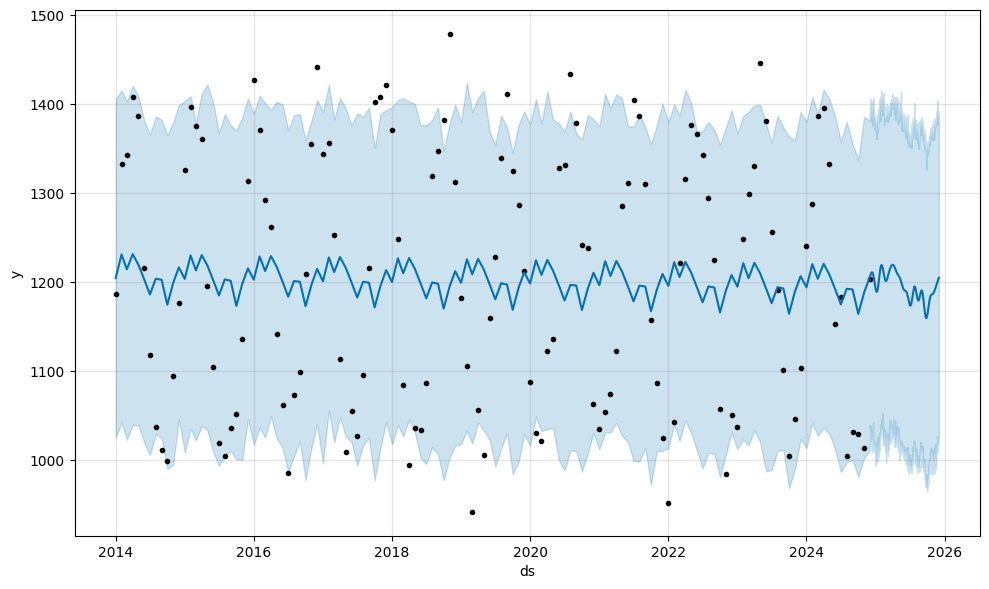

In [6]:
fig1 = m.plot(forecast)

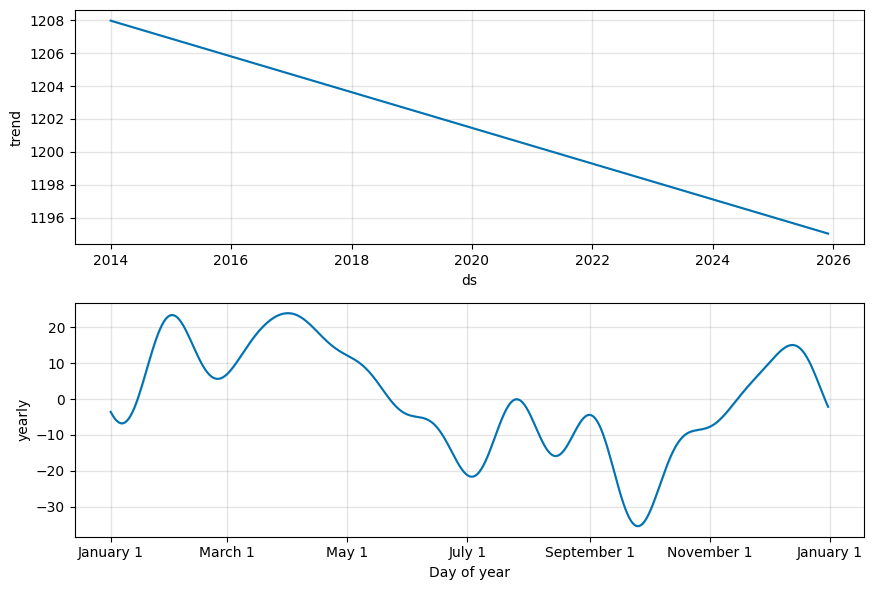

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)